In [13]:
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.patches as patches
from time import time

def rect_to_points(x,y,width,height,angle):
    # x, y, width, height , angle --> (left, top) , (right, top), (right, bottom), (left, bottom)
    rad = np.deg2rad(angle)
    cos = np.cos(rad)
    sin = np.sin(rad)
    
    xs = np.array([-width/2, width/2, width/2, -width/2], dtype='float32')
    ys = np.array([height/2, height/2, -height/2, -height/2],dtype='float32')

    ro_xs = (cos * xs - sin * ys) + x
    ro_ys = (sin * xs + cos * ys) + y 

    return ro_xs, ro_ys 

def calculate_cross_points(x1,y1,x2,y2,x3,y3,x4,y4):

    # cross point of two lines
    d = (x1 - x2) * (y3 - y4) - (y1 -y2) * (x3 - x4)
    nx = (x1*y2 - y1*x2) * (x3 - x4) - (x1 - x2) * (x3*y4 - y3*x4)
    ny = (x1*y2 - y1*x2) * (y3 - y4) - (y1 - y2) * (x3*y4 - y3*x4)

    margin = 0.0001
        
    cross_point = None
    if d != 0:
    
        px = nx/d
        py = ny/d
        
        # margin for float points ex) 1. = 0.9999999
        min_x1 = min(x1, x2) * (1. - margin)
        max_x1 = max(x1, x2) * (1. + margin)
        min_y1 = min(y1, y2) * (1. - margin)
        max_y1 = max(y1, y2) * (1. + margin)
        min_x2 = min(x3, x4) * (1. - margin)
        max_x2 = max(x3, x4) * (1. + margin)
        min_y2 = min(y3, y4) * (1. - margin)
        max_y2 = max(y3, y4) * (1. + margin)

        # check cross point boundary
        if px >= min_x1 and px <= max_x1 and py >= min_y1 and py <= max_y1:
            if px >= min_x2 and px <= max_x2 and py >= min_y2 and py <= max_y2:
                cross_point = (px, py)
    
    return cross_point

def calcuate_cross_product(p0, p1, p2):
    return (p1[0] - p0[0]) * (p2[1] - p0[1]) - (p1[1] - p0[1]) * (p2[0] - p0[0])

def get_cross_points(rect1, rect2):    
    # rect1 = [x, y, width, height, angle]
    # angle == degree

    rect1_xs, rect1_ys = rect_to_points(*rect1)
    rect2_xs, rect2_ys = rect_to_points(*rect2)

    cross_points = [] 

    for i in range(-1, 3):
        x1, y1, x2, y2 = rect1_xs[i], rect1_ys[i], rect1_xs[i+1], rect1_ys[i+1]
        for j in range(-1,3):
            x3, y3, x4, y4 = rect2_xs[j], rect2_ys[j], rect2_xs[j+1], rect2_ys[j+1]
            cross_point = calculate_cross_points(x1,y1,x2,y2,x3,y3,x4,y4)
            if cross_point != None:                
               cross_points.append(cross_point)
    
    # de-duplication
    cross_points = list(set(cross_points))
    return cross_points

def get_inner_points(rect1, rect2):
    # find inner points of rect 2 that exist in rectangle1

    # rect1 = [x, y, width, height, angle]
    # angle == degree
    
    rect1_xs, rect1_ys = rect_to_points(*rect1)
    rect2_xs, rect2_ys = rect_to_points(*rect2) 

    inner_points = []
    
    # rect2 points
    for j in range(-1, 3):
        rect2_p = (rect2_xs[j], rect2_ys[j])
        flag_inner = True
        # rect1 points
        for i in range(-1, 3):
            rect1_p0 = (rect1_xs[i], rect1_ys[i])
            rect1_p1 = (rect1_xs[i+1], rect1_ys[i+1])
        
            cross_product = calcuate_cross_product(rect1_p0, rect1_p1, rect2_p)

            if cross_product > 0:
                flag_inner = False
        if flag_inner:
            inner_points.append(rect2_p)
    
    return inner_points

def calculate_centroid(points):
    return np.mean(points, axis=0)

def calculate_angle(points):
    return np.arctan2(points[:,0], points[:,1])

def sort_points_ccw(points):
    if len(points) < 3:
        return points 
        
    centroid = calculate_centroid(points)
    angles = calculate_angle(points - centroid)
    indices = np.argsort(angles)[::-1]
    sorted_points = points[indices]
    return sorted_points


def calculate_polygon_area(points):
    if len(points) < 3:
        return 0 
        
    x = points[:,0]
    y = points[:,1]

    x = np.insert(x, len(x), x[0])
    y = np.insert(y, len(y), y[0])

    area = np.sum(x[:-1] * y[1:] - y[:-1] * x[1:]) / 2.
    
    return area

def get_random_rotated_rectanlge(canvas_width, canvas_height):
    width = np.random.randint(canvas_width//10, canvas_width//2) 
    height = np.random.randint(canvas_height//10, canvas_height//2) 
    x = np.random.randint(int(canvas_width*0.3), int(canvas_width *0.7))
    y = np.random.randint(int(canvas_height*0.3), int(canvas_height *0.7))
    angle = np.random.randint(0, 360)
        
    # int -> float
    rect = list(map(float, [x, y, width, height, angle]))
    return rect



In [14]:
canvas_width = 200
canvas_height = 200
rect1_points = get_random_rotated_rectanlge(canvas_width=canvas_width, canvas_height=canvas_height)
rect2_points = get_random_rotated_rectanlge(canvas_width=canvas_width, canvas_height=canvas_height)

rect1_area = rect1_points[2] * rect1_points[3]
rect2_area = rect2_points[2] * rect2_points[3]


print('rectangle1 points_x,y,width,height,angle: ', rect1_points)
print('rectangle2 points_x,y,width,height,angle: ', rect2_points)

xy_rect1 = rect_to_points(*rect1_points)
xy_rect2 = rect_to_points(*rect2_points)
print('rectangle1 points_x,y: ', xy_rect1)
print('rectangle2 points_x,y: ', xy_rect2)


start = time()
# cross points 
cross_points = get_cross_points(rect1_points, rect2_points)
print('cross points: ' , cross_points)

# inner points 
rect1_inner_points = get_inner_points(rect2_points, rect1_points)
rect2_inner_points = get_inner_points(rect1_points, rect2_points)

print('rect1 inner points: ' , rect1_inner_points)
print('rect2 inner points: ' , rect2_inner_points)

# intersection region 
intersection_points = cross_points + rect1_inner_points + rect2_inner_points
# de-duplication
intersection_points = np.array(list(set(intersection_points)))
print('intersection points:\n', intersection_points)

intersection_points = sort_points_ccw(intersection_points)
intersection_area = calculate_polygon_area(intersection_points)
intersection_area = round(intersection_area, 3)
print('sorted intersection points ccw:\n', intersection_points)

print(f'delay: {(time() - start) * 1000.:.2f} ms')




rectangle1 points_x,y,width,height,angle:  [95.0, 127.0, 96.0, 99.0, 31.0]
rectangle2 points_x,y,width,height,angle:  [101.0, 118.0, 56.0, 20.0, 249.0]
rectangle1 points_x,y:  (array([ 28.361588, 110.64964 , 161.63841 ,  79.35036 ], dtype=float32), array([144.70795 , 194.15161 , 109.292046,  59.84839 ], dtype=float32))
rectangle2 points_x,y:  (array([120.3701, 100.3015,  81.6299, 101.6985], dtype=float32), array([140.55658,  88.27607,  95.44343, 147.72394], dtype=float32))
cross points:  []
rect1 inner points:  []
rect2 inner points:  [(101.6985, 147.72394), (120.3701, 140.55658), (100.3015, 88.27607), (81.6299, 95.44343)]
intersection points:
 [[120.3701  140.55658]
 [100.3015   88.27607]
 [101.6985  147.72394]
 [ 81.6299   95.44343]]
sorted intersection points ccw:
 [[120.3701  140.55658]
 [101.6985  147.72394]
 [ 81.6299   95.44343]
 [100.3015   88.27607]]
delay: 3.00 ms


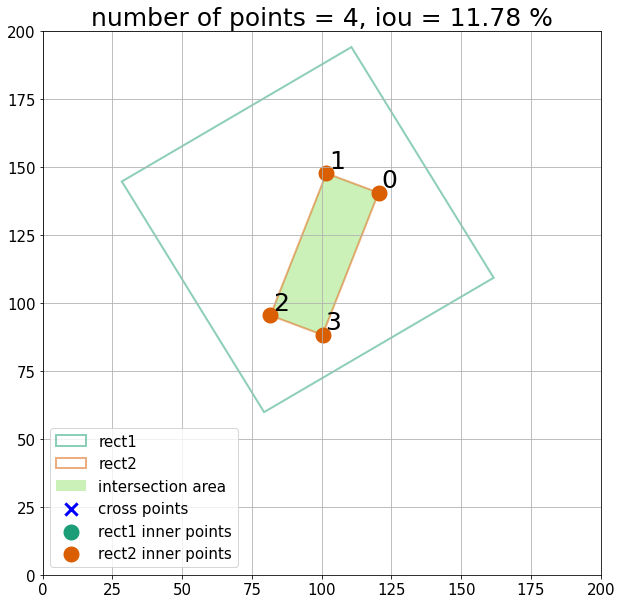

rect1 area:  9504.0
rect2 area:  1120.0
intersection area:  1119.999
iou:  11.78


In [15]:
# draw figure 
rect1 = patches.Polygon(np.array(xy_rect1).T, edgecolor='#1B9E77', alpha=0.5, linewidth=2, fill=False, label='rect1')
rect2 = patches.Polygon(np.array(xy_rect2).T, edgecolor='#D95F02', alpha=0.5, linewidth=2, fill=False, label='rect2')

cross_points_x = [x[0] for x in cross_points]
cross_points_y = [x[1] for x in cross_points]

rect1_inner_points_x = [x[0] for x in rect1_inner_points]
rect1_inner_points_y = [x[1] for x in rect1_inner_points]
rect2_inner_points_x = [x[0] for x in rect2_inner_points]
rect2_inner_points_y = [x[1] for x in rect2_inner_points]

intersection_points = np.array([list(x) for x in intersection_points])

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(0,canvas_width)
ax.set_ylim(0,canvas_height)
ax.add_patch(rect1)
ax.add_patch(rect2)

if len(intersection_points) > 0:
    for i, point in enumerate(intersection_points):
        ax.text(point[0] + 1, point[1] + 2, i, fontsize=25) 

if len(intersection_points) > 2:
    inter_area = patches.Polygon(intersection_points, facecolor='#99E472', alpha=0.5, fill=True, label='intersection area', zorder=0)
    ax.add_patch(inter_area)
 
          
ax.scatter(cross_points_x, cross_points_y, facecolor='b', marker='x', s=150, linewidths=3, label='cross points')
ax.scatter(rect1_inner_points_x, rect1_inner_points_y,facecolor='#1B9E77',linewidths=10, label='rect1 inner points')
ax.scatter(rect2_inner_points_x, rect2_inner_points_y,facecolor='#D95F02',linewidths=10, label='rect2 inner points' )

ax.grid()
ax.legend(fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
iou = round(intersection_area / (rect1_area + rect2_area - intersection_area) * 100,2)
ax.set_title(f'number of points = {len(intersection_points)}, iou = {iou} %', fontsize=25)
plt.show()

print('rect1 area: ',rect1_area)
print('rect2 area: ',rect2_area)
print('intersection area: ',intersection_area)
print('iou: ',iou)